<a href="https://colab.research.google.com/github/yorketh/machine-learning/blob/master/(in%20progress)%20transformer-q-reinforcement-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer-based deep Q-reinforcement learning for deriving an optimal promotion strategy considering Peter Principle

# Naive (2009), promote as much as needed at a time to cover holes in a level

In [ ]:
import numpy as np
import random
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 15, 10


def get_random(mode, value=None):
  ran = 0

  if mode=='competence_peter' or mode=='competence':
    while ran>10. or ran<1.:
      ran = random.gauss(7, 2)
    return ran

  elif mode == 'competence_common':
    variation = np.random.uniform(-1, 1)
    while value+variation<1. or value+variation>10.:
      variation = np.random.uniform(-1, 1)
    return value+variation

  elif mode=='age':
    while int(ran) not in range(18,61):
      ran = random.gauss(25, 5)
    return int(ran)


def promotion_strategy(criterion='random', hypothesis='peter', epochs=1000):

  options = [min, max, random.choice]
  efficiency = []

  coefs = np.array([1.,.9,.8,.6,.4,.2])
  
  hierarchy = [
  [[get_random('age'), get_random('competence')]],
  [[get_random('age'), get_random('competence')] for i in range(5)],
  [[get_random('age'), get_random('competence')] for i in range(11)],
  [[get_random('age'), get_random('competence')] for i in range(21)],
  [[get_random('age'), get_random('competence')] for i in range(41)],
  [[get_random('age'), get_random('competence')] for i in range(81)]
  ]

  param = dict(zip(range(6), [len(level) for level in hierarchy]))
  
  """
  print('Start')
  print(f'Top level: {hierarchy[0]}')
  print(f'2 level: {hierarchy[1]}')
  print(f'3 level: {hierarchy[2]}')
  print(f'4 level: {hierarchy[3]}')
  print(f'5 level: {hierarchy[4]}')
  print(f'6 level: {hierarchy[5]}')
  """

  max_competences = np.array([10*len(level) for level in hierarchy])

  for epoch in range(epochs):
    #print('Start of cycle')
    level_competences = np.array([sum([i[1] for i in level]) for level in hierarchy])
    org_ef = np.matmul(coefs, level_competences)
    efficiency.append(org_ef/((np.matmul(coefs, max_competences)/160) * 160))

    for level in hierarchy:
      for worker in level:
        if worker[0]>60 or worker[1]<4:
          level.remove(worker)
    #print('After removal', [len(i) for i in hierarchy])
    for level in hierarchy:
      
      while len(level)!= param[hierarchy.index(level)]:
        #print([len(i) for i in hierarchy])
        if hierarchy.index(level) != len(hierarchy)-1:
          prev = hierarchy[hierarchy.index(level)+1]
          if criterion=='best':
            chosen = prev[[k[1] for k in prev].index(max([k[1] for k in prev]))]
          elif criterion=='worst':
            chosen = prev[[k[1] for k in prev].index(min([k[1] for k in prev]))]
          elif criterion=='random':
            chosen = prev[[k[1] for k in prev].index(random.choice([k[1] for k in prev]))]
          elif criterion=='random_min_max':
            chosen = prev[[k[1] for k in prev].index(random.choice(options)([k[1] for k in prev]))]
          hierarchy[hierarchy.index(level)+1].remove(chosen)
          #prev.remove(chosen)
          if hypothesis == 'peter':
            if hierarchy.index(level) not in [0,1]:
              level.append([chosen[0], get_random('competence_common', chosen[1])])
            else:
              level.append([chosen[0], get_random('competence_peter')])  
          elif hypothesis == 'common':
            level.append([chosen[0], get_random('competence_common', chosen[1])]) 
        else:
          level.append([get_random('age'), get_random('competence')])
      #print([len(i) for i in hierarchy])
      for worker in level: 
        age = worker[0]+1
        worker[0] = age

  """
  print('End')
  print(f'Top level: {len(hierarchy[0]), hierarchy[0]}')
  print(f'2 level: {len(hierarchy[1]), hierarchy[1]}')
  print(f'3 level: {len(hierarchy[2]),hierarchy[2]}')
  print(f'4 level: {len(hierarchy[3]),hierarchy[3]}')
  print(f'5 level: {len(hierarchy[4]),hierarchy[4]}')
  print(f'6 level: {len(hierarchy[5]),hierarchy[5]}')
  """

  #print(efficiency)
  #print(f'Average efficiency: {round(np.mean(efficiency)*100, 2)}%')
  
  return efficiency


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
epochs=1000

def simulate_ntimes(epochs=1000, hypothesis='peter', n=50):
  rand = np.zeros(epochs)
  best = np.zeros(epochs)
  worst = np.zeros(epochs)
  rand_min_max = np.zeros(epochs)
  
  for i in range(n):
    efficiency_random = np.array(promotion_strategy('random', hypothesis, epochs))
    rand += efficiency_random

    efficiency_best = np.array(promotion_strategy('best', hypothesis, epochs))
    best += efficiency_best

    efficiency_worst = np.array(promotion_strategy('worst', hypothesis, epochs))
    worst += efficiency_worst

    efficiency_rand_min_max = np.array(promotion_strategy('random_min_max', hypothesis, epochs))
    rand_min_max += efficiency_rand_min_max

  return [rand/n, best/n, worst/n, rand_min_max/n]
    

efficiency = simulate_ntimes(epochs=epochs)


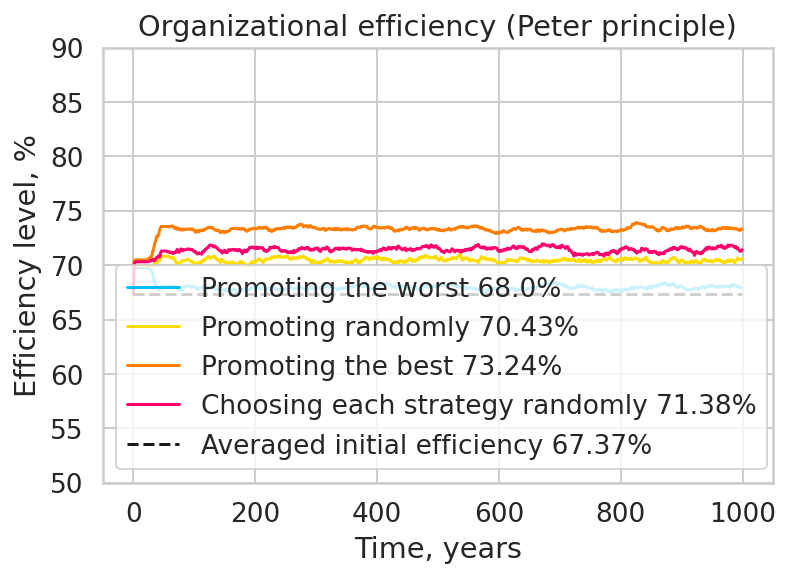

In [ ]:

plt.plot(range(epochs), efficiency[2]*100, 
         label=f'Promoting the worst {round(np.mean(efficiency[2])*100, 2)}%')
plt.plot(range(epochs), efficiency[0]*100, 
         label=f'Promoting randomly {round(np.mean(efficiency[0])*100, 2)}%')
plt.plot(range(epochs), efficiency[1]*100, 
         label=f'Promoting the best {round(np.mean(efficiency[1])*100, 2)}%')
plt.plot(range(epochs), efficiency[3]*100, 
         label=f'Choosing each strategy randomly {round(np.mean(efficiency[3])*100, 2)}%')
plt.plot(range(epochs), 
         [round(np.mean([i[0] for i in efficiency])*100, 2)]*epochs, '--', 
         color='k', 
         label=f'Averaged initial efficiency {round(np.mean([i[0] for i in efficiency])*100, 2)}%')

plt.ylim(50,90)
plt.title('Organizational efficiency (Peter principle)')
plt.ylabel('Efficiency level, %')
plt.xlabel('Time, years')
plt.legend()



In [ ]:
epochs=1000

efficiency = simulate_ntimes(epochs=epochs, hypothesis='common')


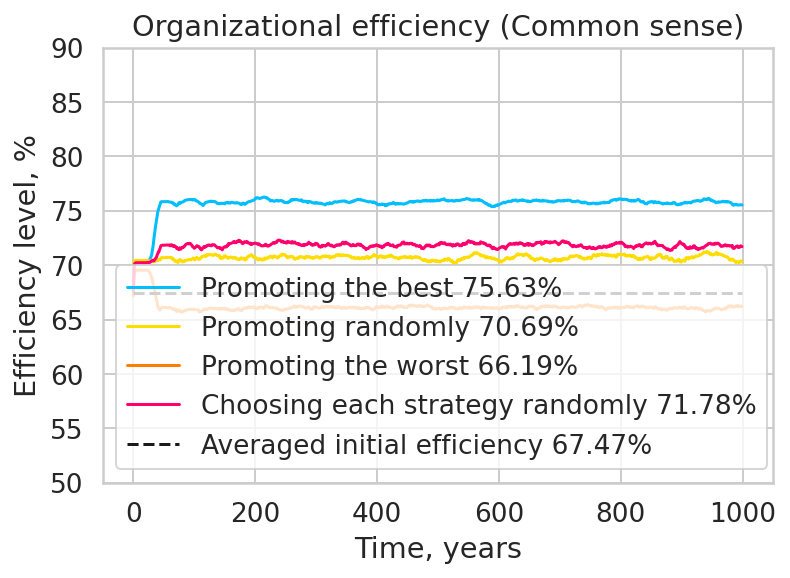

In [ ]:
plt.plot(range(epochs), efficiency[1]*100, 
         label=f'Promoting the best {round(np.mean(efficiency[1])*100, 2)}%')
plt.plot(range(epochs), efficiency[0]*100, 
         label=f'Promoting randomly {round(np.mean(efficiency[0])*100, 2)}%')
plt.plot(range(epochs), efficiency[2]*100, 
         label=f'Promoting the worst {round(np.mean(efficiency[2])*100, 2)}%')
plt.plot(range(epochs), efficiency[3]*100, 
         label=f'Choosing each strategy randomly {round(np.mean(efficiency[3])*100, 2)}%')
plt.plot(range(epochs), 
         [round(np.mean([i[0] for i in efficiency])*100, 2)]*epochs, '--', 
         color='k', 
         label=f'Averaged initial efficiency {round(np.mean([i[0] for i in efficiency])*100, 2)}%')

plt.ylim(50,90)
plt.title('Organizational efficiency (Common sense)')
plt.ylabel('Efficiency level, %')
plt.xlabel('Time, years')
plt.legend()



# Naive (2009), promote 1 at a time

In [ ]:
def promotion_strategy(criterion='random', hypothesis='peter', epochs=1000):

  num_levels = 6
  options = [min, max, random.choice]
  efficiency = []

  coefs = np.array([1.,.9,.8,.6,.4,.2])
  
  hierarchy = [
  [[get_random('age'), get_random('competence')]],
  [[get_random('age'), get_random('competence')] for i in range(5)],
  [[get_random('age'), get_random('competence')] for i in range(11)],
  [[get_random('age'), get_random('competence')] for i in range(21)],
  [[get_random('age'), get_random('competence')] for i in range(41)],
  [[get_random('age'), get_random('competence')] for i in range(81)]
  ]

  param = dict(zip(range(num_levels), [len(level) for level in hierarchy]))
  
  """
  print('Start')
  print(f'Top level: {hierarchy[0]}')
  print(f'2 level: {hierarchy[1]}')
  print(f'3 level: {hierarchy[2]}')
  print(f'4 level: {hierarchy[3]}')
  print(f'5 level: {hierarchy[4]}')
  print(f'6 level: {hierarchy[5]}')
  """

  max_competences = np.array([10*len(level) for level in hierarchy])

  for epoch in range(epochs):
    #print('Start of cycle')
    level_competences = np.array([sum([i[1] for i in level]) for level in hierarchy])
    org_ef = np.matmul(coefs, level_competences)
    efficiency.append(org_ef/((np.matmul(coefs, max_competences)/160) * 160))

    for level in hierarchy:
      for worker in level:
        if worker[0]>60 or worker[1]<4:
          level.remove(worker)
    #print('After removal', [len(i) for i in hierarchy])
    #print([len(i) for i in hierarchy])
    while [len(i) for i in hierarchy]!=[param[i] for i in range(num_levels)]:
      #print([len(i) for i in hierarchy])
      #print([param[i] for i in range(num_levels)])
      for level in hierarchy:
        if len(level)!=param[hierarchy.index(level)]:
          if hierarchy.index(level) != len(hierarchy)-1:
            prev = hierarchy[hierarchy.index(level)+1]
            if criterion=='best':
              chosen = prev[[k[1] for k in prev].index(max([k[1] for k in prev]))]
            elif criterion=='worst':
              chosen = prev[[k[1] for k in prev].index(min([k[1] for k in prev]))]
            elif criterion=='random':
              chosen = prev[[k[1] for k in prev].index(random.choice([k[1] for k in prev]))]
            elif criterion=='random_min_max':
              chosen = prev[[k[1] for k in prev].index(random.choice(options)([k[1] for k in prev]))]
            hierarchy[hierarchy.index(level)+1].remove(chosen)
            #prev.remove(chosen)
            if hypothesis == 'peter':
              if hierarchy.index(level) not in [1]:
                level.append([chosen[0], get_random('competence_common', chosen[1])])
              else:
                level.append([chosen[0], get_random('competence_peter')]) 
            elif hypothesis == 'common':
              level.append([chosen[0], get_random('competence_common', chosen[1])]) 
          else:
            #print('last level')
            #print(hierarchy.index(level))
            level.append([get_random('age'), get_random('competence')])
    #print('End of cycle', [len(i) for i in hierarchy])
    
    for level in hierarchy:
      for worker in level: 
        age = worker[0]+1
        worker[0] = age
    
  """
  print('End')
  print(f'Top level: {len(hierarchy[0]), hierarchy[0]}')
  print(f'2 level: {len(hierarchy[1]), hierarchy[1]}')
  print(f'3 level: {len(hierarchy[2]),hierarchy[2]}')
  print(f'4 level: {len(hierarchy[3]),hierarchy[3]}')
  print(f'5 level: {len(hierarchy[4]),hierarchy[4]}')
  print(f'6 level: {len(hierarchy[5]),hierarchy[5]}')
  """

  #print(efficiency)
  #print(f'Average efficiency: {round(np.mean(efficiency)*100, 2)}%')
  
  return efficiency

In [ ]:
epochs = 1000
efficiency = simulate_ntimes(epochs=epochs)

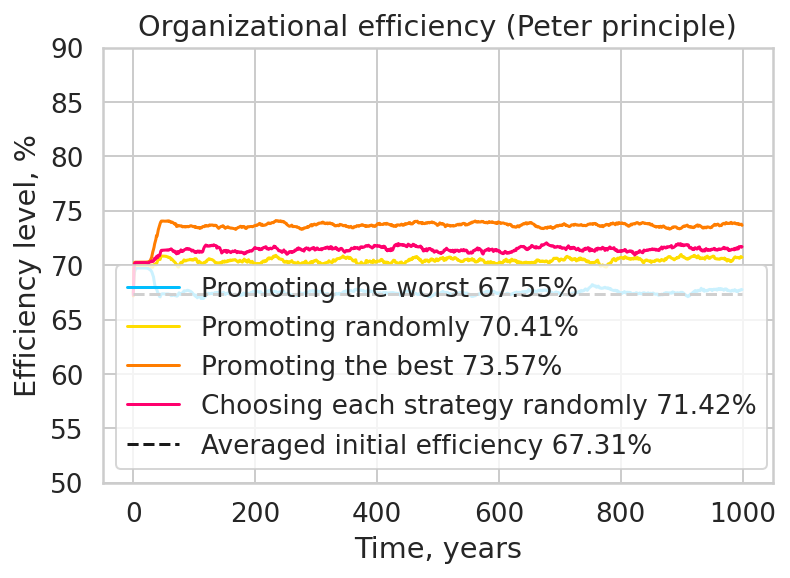

In [ ]:

plt.plot(range(epochs), efficiency[2]*100, 
         label=f'Promoting the worst {round(np.mean(efficiency[2])*100, 2)}%')
plt.plot(range(epochs), efficiency[0]*100, 
         label=f'Promoting randomly {round(np.mean(efficiency[0])*100, 2)}%')
plt.plot(range(epochs), efficiency[1]*100, 
         label=f'Promoting the best {round(np.mean(efficiency[1])*100, 2)}%')
plt.plot(range(epochs), efficiency[3]*100, 
         label=f'Choosing each strategy randomly {round(np.mean(efficiency[3])*100, 2)}%')
plt.plot(range(epochs), 
         [round(np.mean([i[0] for i in efficiency])*100, 2)]*epochs, '--', 
         color='k', 
         label=f'Averaged initial efficiency {round(np.mean([i[0] for i in efficiency])*100, 2)}%')

plt.ylim(50,90)
plt.title('Organizational efficiency (Peter principle)')
plt.ylabel('Efficiency level, %')
plt.xlabel('Time, years')
plt.legend()



In [ ]:
efficiency = simulate_ntimes(epochs=epochs, hypothesis='common')

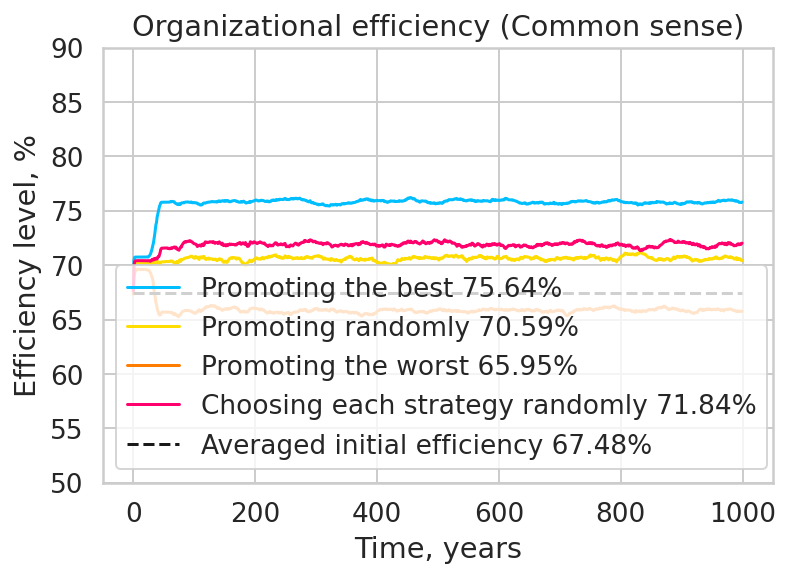

In [ ]:
plt.plot(range(epochs), efficiency[1]*100, 
         label=f'Promoting the best {round(np.mean(efficiency[1])*100, 2)}%')
plt.plot(range(epochs), efficiency[0]*100, 
         label=f'Promoting randomly {round(np.mean(efficiency[0])*100, 2)}%')
plt.plot(range(epochs), efficiency[2]*100, 
         label=f'Promoting the worst {round(np.mean(efficiency[2])*100, 2)}%')
plt.plot(range(epochs), efficiency[3]*100, 
         label=f'Choosing each strategy randomly {round(np.mean(efficiency[3])*100, 2)}%')
plt.plot(range(epochs), 
         [round(np.mean([i[0] for i in efficiency])*100, 2)]*epochs, '--', 
         color='k', 
         label=f'Averaged initial efficiency {round(np.mean([i[0] for i in efficiency])*100, 2)}%')

plt.ylim(50,90)
plt.title('Organizational efficiency (Common sense)')
plt.ylabel('Efficiency level, %')
plt.xlabel('Time, years')
plt.legend()



# Robust (2018)

In [ ]:
def get_hierarchy(num_levels, coordin_num):
    hierarchy = []
    for i in range(num_levels):
      hierarchy.append([[get_random('age'), get_random('competence')] 
                        for y in range(coordin_num**i)])
    return hierarchy


def promotion_strategy(criterion='random_100', hypothesis='peter', coordin_num = 6, 
                       epochs=1000):

  num_levels = 5

  options = [min, max, random.choice]
  options_75 = [max, random.choice, random.choice, random.choice]
  options_50 = [max, random.choice]
  options_25 = [max, max, max, random.choice]
  efficiency = []

  coefs = np.array([1.,.8,.6,.4,.2])
  
  hierarchy = get_hierarchy(num_levels, coordin_num)

  param = dict(zip(range(num_levels), [len(level) for level in hierarchy]))
  
  """a
  print('Start')
  print(f'Top level: {hierarchy[0]}')
  print(f'2 level: {hierarchy[1]}')
  print(f'3 level: {hierarchy[2]}')
  print(f'4 level: {hierarchy[3]}')
  print(f'5 level: {hierarchy[4]}')
  print(f'6 level: {hierarchy[5]}')
  """
  count = 0
  max_competences = np.array([10*len(level) for level in hierarchy])
  num_employees = sum(len(level) for level in hierarchy)


  def step(criterion):
    level_competences = np.array([sum([i[1] for i in level]) for level in hierarchy])
    org_ef = np.matmul(coefs, level_competences)
    efficiency.append(org_ef/((np.matmul(coefs, max_competences)/num_employees) * num_employees))

    for level in hierarchy:
      for worker in level:
        if worker[0]>60 or worker[1]<4:
          level.remove(worker)

    while [len(i) for i in hierarchy]!=[param[i] for i in range(num_levels)]:
      for level in hierarchy:
        if len(level)!=param[hierarchy.index(level)]:
          if hierarchy.index(level) != len(hierarchy)-1:
            prev = hierarchy[hierarchy.index(level)+1]
            if criterion=='best':
              chosen = prev[[k[1] for k in prev].index(max([k[1] for k in prev]))]
            elif criterion=='worst':
              chosen = prev[[k[1] for k in prev].index(min([k[1] for k in prev]))]
            elif criterion=='random_100':
              chosen = prev[[k[1] for k in prev].index(random.choice([k[1] for k in prev]))]
            elif criterion=='random_75':
              chosen = prev[[k[1] for k in prev].index(random.choice(options_75)([k[1] for k in prev]))]
            elif criterion=='random_50':
              chosen = prev[[k[1] for k in prev].index(random.choice(options_50)([k[1] for k in prev]))]
            elif criterion=='random_25':
              chosen = prev[[k[1] for k in prev].index(random.choice(options_25)([k[1] for k in prev]))]
            elif criterion=='random_min_max':
              chosen = prev[[k[1] for k in prev].index(random.choice(options)([k[1] for k in prev]))]
            hierarchy[hierarchy.index(level)+1].remove(chosen)
            #prev.remove(chosen)
            if hypothesis == 'peter':
              if hierarchy.index(level) not in [0,1]:
                level.append([chosen[0], get_random('competence_common', chosen[1])])
              else:
                level.append([chosen[0], get_random('competence_peter')]) 
            elif hypothesis == 'common':
              level.append([chosen[0], get_random('competence_common', chosen[1])]) 
          else:
            level.append([get_random('age'), get_random('competence')])

    if epoch % 12 == 0:
      #print(epoch)
      for level in hierarchy:
        for worker in level: 
          age = worker[0]+1
          worker[0] = age


  for epoch in range(1, 2*epochs+1):
    #print('Month', epoch)
    if epoch<epochs+1:
      step(criterion='best')
      
      count+=1
    else: 
      step(criterion=criterion)
      
      count+=1
      
    
  """
  print('End')
  print(f'Top level: {len(hierarchy[0]), hierarchy[0]}')
  print(f'2 level: {len(hierarchy[1]), hierarchy[1]}')
  print(f'3 level: {len(hierarchy[2]),hierarchy[2]}')
  print(f'4 level: {len(hierarchy[3]),hierarchy[3]}')
  print(f'5 level: {len(hierarchy[4]),hierarchy[4]}')
  print(f'6 level: {len(hierarchy[5]),hierarchy[5]}')
  """
  
  strategy = np.array(efficiency[1000:]) - np.mean(efficiency[500:1000]) # difference between new start and average stationary per (5-10%)
  #print(np.mean(strategy))
  return strategy

In [ ]:
import numpy as np
import random
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 15, 10

In [ ]:
epochs=1000
coordin_num=6
n=50
def simulate_ntimes(epochs=1000, hypothesis='peter', coordin_num=6, n=50):
  rand_100 = np.zeros(epochs)
  rand_75 = np.zeros(epochs)
  rand_50 = np.zeros(epochs)
  rand_25 = np.zeros(epochs)
  best = np.zeros(epochs)
  worst = np.zeros(epochs)
  rand_min_max = np.zeros(epochs)
  
  for i in range(n):
    efficiency_random_100 = np.array(promotion_strategy('random_100', hypothesis, coordin_num, epochs))
    rand_100 += efficiency_random_100

    efficiency_random_75 = np.array(promotion_strategy('random_75', hypothesis, coordin_num, epochs))
    rand_75+= efficiency_random_75

    efficiency_random_50 = np.array(promotion_strategy('random_50', hypothesis, coordin_num, epochs))
    rand_50 += efficiency_random_50

    efficiency_random_25 = np.array(promotion_strategy('random_25', hypothesis, coordin_num, epochs))
    rand_25 += efficiency_random_25

    efficiency_best = np.array(promotion_strategy('best', hypothesis, coordin_num, epochs))
    best += efficiency_best

    efficiency_worst = np.array(promotion_strategy('worst', hypothesis, coordin_num, epochs))
    worst += efficiency_worst

    #efficiency_rand_min_max = np.array(promotion_strategy('random_min_max', hypothesis, coordin_num, epochs))
    #rand_min_max += efficiency_rand_min_max

  return [rand_100/n, rand_75/n, rand_50/n, rand_25/n, best/n, worst/n]
    

efficiency = simulate_ntimes(epochs=epochs, coordin_num=coordin_num, n=n)


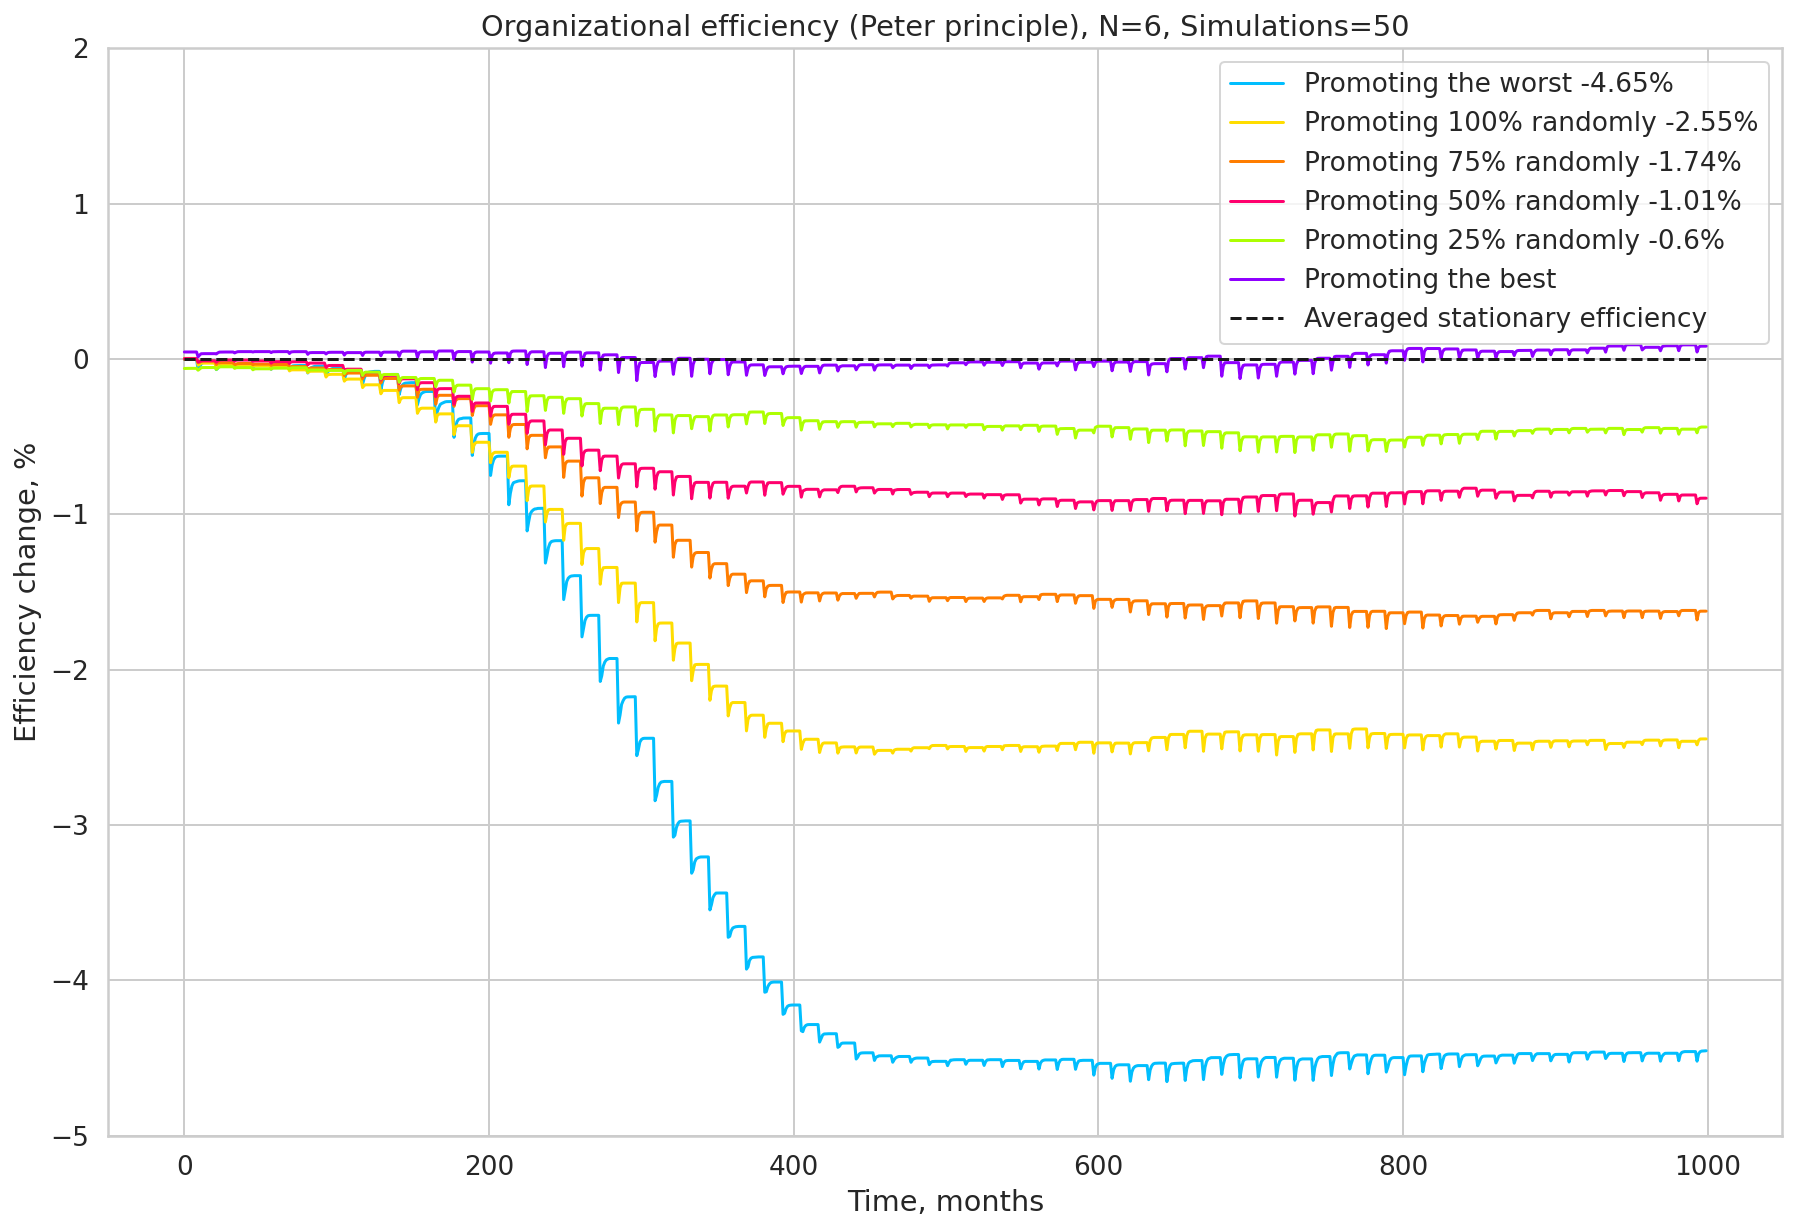

In [ ]:
plt.plot(range(1000), efficiency[5]*100, 
         label=f'Promoting the worst {round(np.min(efficiency[5])*100, 2)}%')
plt.plot(range(1000), efficiency[0]*100, 
         label=f'Promoting 100% randomly {round(np.min(efficiency[0])*100, 2)}%')
plt.plot(range(1000), efficiency[1]*100, 
         label=f'Promoting 75% randomly {round(np.min(efficiency[1])*100, 2)}%')
plt.plot(range(1000), efficiency[2]*100, 
         label=f'Promoting 50% randomly {round(np.min(efficiency[2])*100, 2)}%')
plt.plot(range(1000), efficiency[3]*100, 
         label=f'Promoting 25% randomly {round(np.min(efficiency[3])*100, 2)}%')
#plt.plot(range(1000), efficiency[6]*100, 
         #label=f'Choosing each strategy randomly +{round(np.max(efficiency[6])*100, 2)}%')
plt.plot(range(1000), np.array(efficiency[4])*100, 
         label=f'Promoting the best')

plt.plot(range(1000), 
         np.zeros(1000), '--', 
         color='k', 
         label=f'Averaged stationary efficiency')

plt.ylim(-5,2)
plt.title(f'Organizational efficiency (Peter principle), N={coordin_num}, Simulations={n}')
plt.ylabel('Efficiency change, %')
plt.xlabel('Time, months')
plt.legend()


In [ ]:
efficiency = simulate_ntimes(epochs=epochs, hypothesis='common', coordin_num=coordin_num, n=n)

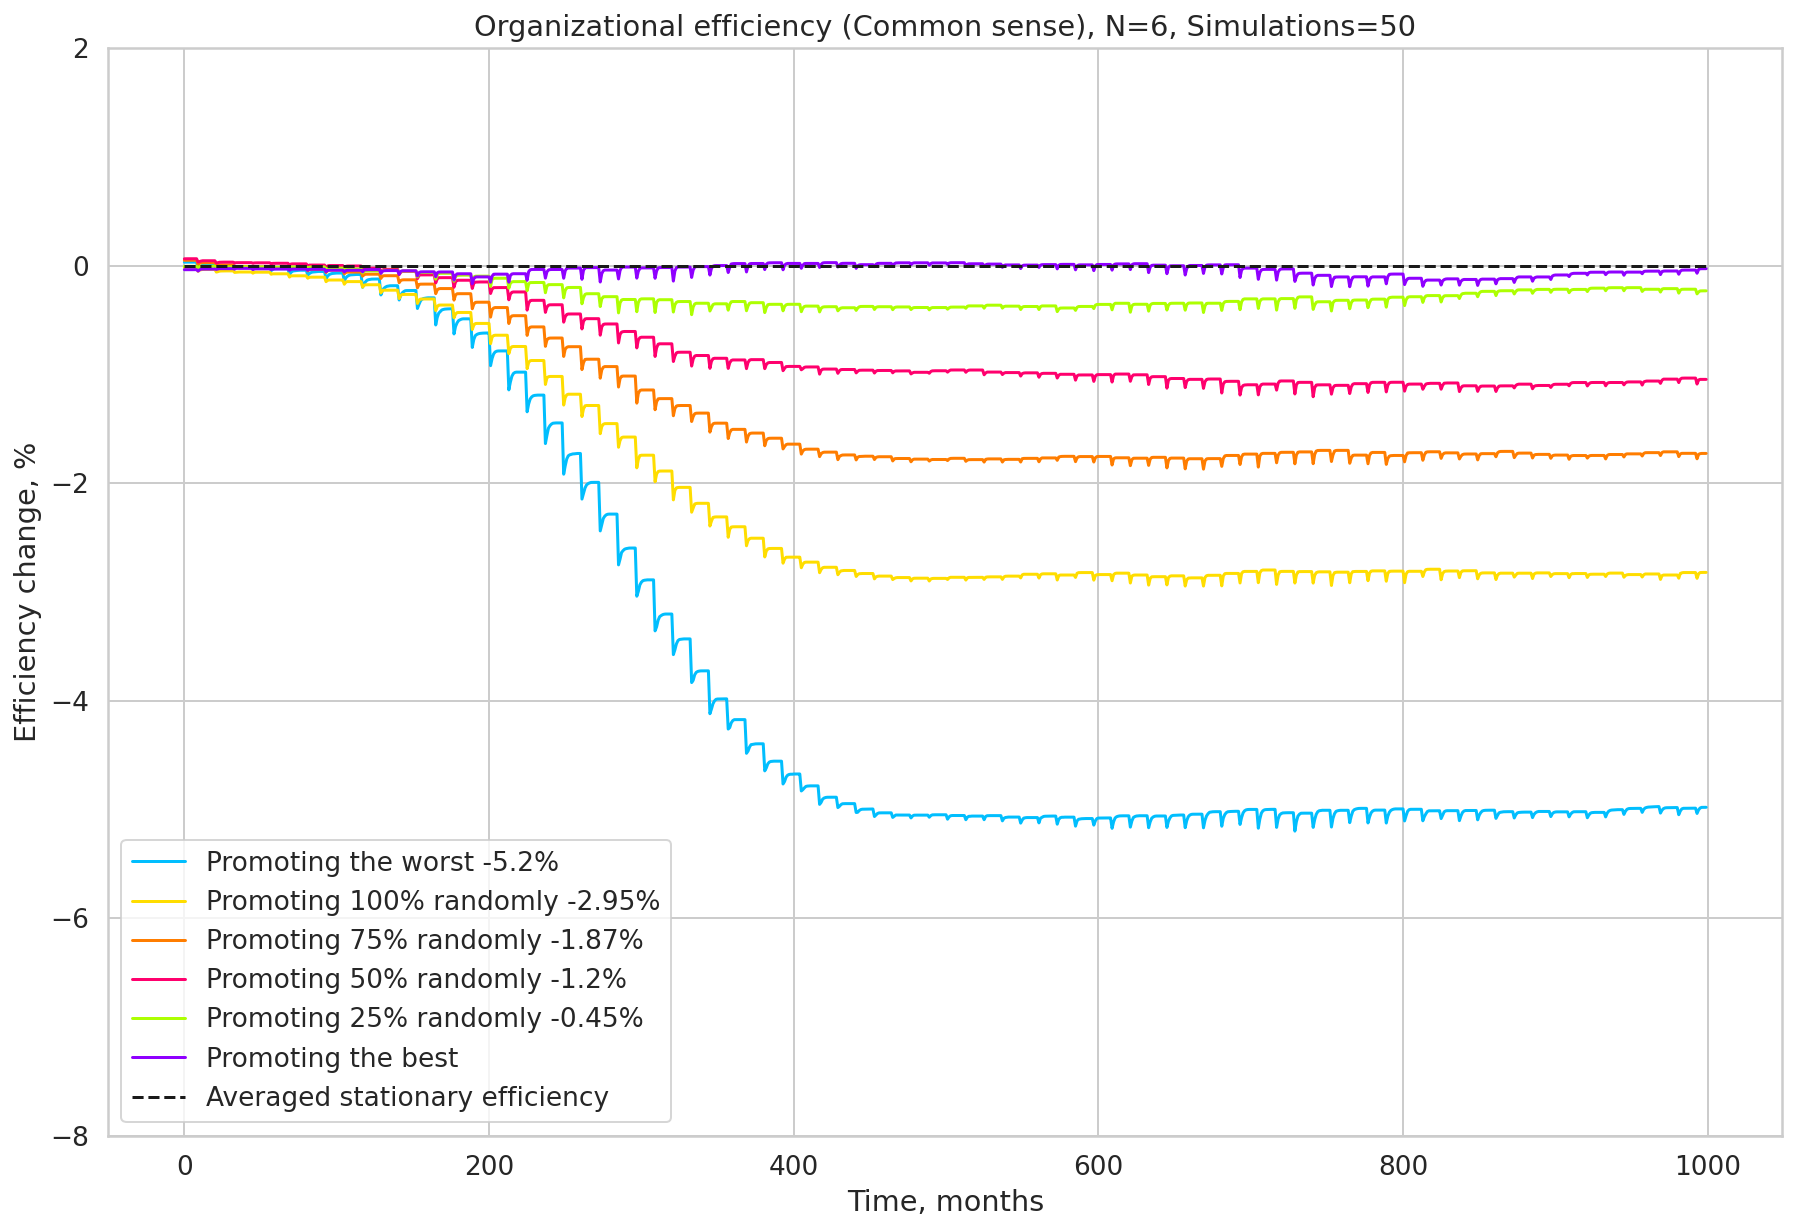

In [ ]:
plt.plot(range(1000), efficiency[5]*100, 
         label=f'Promoting the worst {round(np.min(efficiency[5])*100, 2)}%')
plt.plot(range(1000), efficiency[0]*100, 
         label=f'Promoting 100% randomly {round(np.min(efficiency[0])*100, 2)}%')
plt.plot(range(1000), efficiency[1]*100, 
         label=f'Promoting 75% randomly {round(np.min(efficiency[1])*100, 2)}%')
plt.plot(range(1000), efficiency[2]*100, 
         label=f'Promoting 50% randomly {round(np.min(efficiency[2])*100, 2)}%')
plt.plot(range(1000), efficiency[3]*100, 
         label=f'Promoting 25% randomly {round(np.min(efficiency[3])*100, 2)}%')
#plt.plot(range(1000), efficiency[6]*100, 
         #label=f'Choosing each strategy randomly +{round(np.max(efficiency[6])*100, 2)}%')
plt.plot(range(1000), np.array(efficiency[4])*100, 
         label=f'Promoting the best')

plt.plot(range(1000), 
         np.zeros(1000), '--', 
         color='k', 
         label=f'Averaged stationary efficiency')

plt.ylim(-8,2)
plt.title(f'Organizational efficiency (Common sense), N={coordin_num}, Simulations={n}')
plt.ylabel('Efficiency change, %')
plt.xlabel('Time, months')
plt.legend()


In [ ]:
lst = [1,2,3]
a = lst
print(a, lst)
a.remove(2)
print(a, lst)

[1, 2, 3] [1, 2, 3]
[1, 3] [1, 3]


# Robust w/ Q-learning

In [ ]:
import torch
from torch import nn

In [ ]:
import random

In [ ]:
import torch
from torch import nn
import numpy as np



In [ ]:
import numpy as np
import random
import torch
from torch import nn
from operator import itemgetter
import copy

In [ ]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')
replay_memory = []
efficiency = []
#options = [min, max]

param = {0:1, 1:6 , 2:36, 3:216, 4:1296}

class GameState:
  def __init__(self):
    super(GameState, self).__init__()
    self.full_cycle = 0

  def get_random(self, mode, value=None):
    ran = 0

    if mode=='competence_peter' or mode=='competence':
      while ran>10. or ran<1.:
        ran = random.gauss(7, 2)
      return ran

    elif mode == 'competence_common':
      variation = np.random.uniform(-1, 1)
      while value+variation<1. or value+variation>10.:
        variation = np.random.uniform(-1, 1)
      return value+variation

    elif mode=='age':
      while int(ran) not in range(18,61):
        ran = random.gauss(25, 5)
      return float(int(ran))


  def get_hierarchy(self, num_levels, coordin_num):
    hierarchy = []
    for i in range(num_levels):
      hierarchy.append([[self.get_random('age'), self.get_random('competence')] 
                        for y in range(coordin_num**i)])
    return hierarchy

  
  
  def calculate_efficiency(self, hierarchy):
    max_competences = np.array([10*len(level) for level in hierarchy])
    
    num_employees = sum(len(level) for level in hierarchy)
    coefs = np.array([1.,.8,.6,.4,.2])

    level_competences = np.array([sum([i[1] if len(level)!=0 else 0 for i in level]) for
                                  level in hierarchy])
    
    org_ef = np.matmul(coefs, level_competences)

    efficiency.append(org_ef/((np.matmul(coefs, max_competences)/num_employees) *
                              num_employees))
    

  def get_from_new(self, hierarchy):

    while [len(level) for level in hierarchy[:4]] == [param[i] for i in range(4)]:
      for level in hierarchy:
        for worker in level:
          if worker[0]>60 or worker[1]<4:
            level.remove(worker)
      if [len(level) for level in hierarchy[:4]] == [param[i] for i in range(4)]:
        for level in hierarchy:
          for worker in level:
            age = worker[0]
            worker[0] = age+1

    
    for level in hierarchy: # sort every level by competence
      if len(level)!=0:
        hierarchy[hierarchy.index(level)] = sorted(level, key=lambda x: x[1], reverse=True)

    level_num=0
    while len(hierarchy[level_num]) == param[level_num]:
      level_num+=1
    else:
      state_ = hierarchy[level_num] # to promote to
      state_ = state_ + ([[0.,0.]]*(1296-len(state_)))

      state_2 = hierarchy[level_num+1] # to promote from
      state_2 = state_2 + ([[0.,0.]]*(1296-len(state_2)))

    return state_, state_2, level_num, hierarchy



  def get_first(self, num_levels, coordin_num):
    hierarchy = self.get_hierarchy(num_levels, coordin_num)

    state_, state_2, level_num, hierarchy = self.get_from_new(hierarchy)

    mask = torch.ones([1296])
    ind = dict(zip(range(1296), state_2))
              
    for i in ind:
      if list(ind[i]) == [0.,0.]:
        mask[i] = -1e7
              
    return torch.tensor(state_).view(1,1296,2), torch.tensor(state_2).view(1,1296,2), hierarchy, level_num, mask.view(1,1296)


  def step(self, action, state, hierarchy, level_num):
    self.calculate_efficiency(hierarchy)
    state = state[0]

    #crit = list(action).index(1)
    #worker_ind = list(action).index(1)
    
    """
    if options[crit] == max:
      worker_ind = np.argmax([i[1] for i in state])
      prom = state[worker_ind]
    else:
      min_comp = min([i[1] for i in state if i[1]!=0])
      for i in range(1296):
        if state[i][1]!=min_comp:
          continue
        else:
          prom = state[i]
          worker_ind = i
    """
    worker_ind = list(action).index(1)

    prom = state[worker_ind]

    if list(prom)==[0.,0.]:
      print('ERROR', prom)
    #print(prom)
    # add to upper level
    if level_num in [0,1]:
      hierarchy[level_num].append([prom[0], self.get_random('competence')])
    else:
      hierarchy[level_num].append([prom[0], self.get_random('competence_common', prom[1])])


    # remove from lower level
    state = torch.cat((state[:worker_ind], torch.tensor([[0.,0.]]), 
                       state[worker_ind+1:]))
    hierarchy[level_num+1] = [list(i) for i in state if list(i)!=[0.,0.]]
    
    self.calculate_efficiency(hierarchy)
    reward = (efficiency[-1]-efficiency[-2])*1e4
    """
    if efficiency[-1]-efficiency[-2]>0:
      reward = 1
    else:
      reward = -1
    """

    if level_num!=3:
      for level in hierarchy: # sort every level by competence
          if len(level)!=0:
            hierarchy[hierarchy.index(level)] = sorted(level, key=lambda x: x[1], reverse=True)
      
      terminal = False
      state_ = hierarchy[level_num+1] # to promote to
      state_ = state_ + ([[0.,0.]]*(1296-len(state_)))

      state_2 = hierarchy[level_num+2] # to promote from
      state_2 = state_2 + ([[0.,0.]]*(1296-len(state_2)))
      
      level_num+=1

    # if level to promote was 3 (4th/5)
    else:
      if [len(i) for i in hierarchy[:4]]==[param[i] for i in range(4)]:
        terminal=True

        ind = dict(zip(range(1296), state))
        # replacing all [0,0] withe new workers
        for i in ind:
          if list(ind[i]) == [0.,0.]:
            state[i] = torch.tensor([self.get_random('age'), self.get_random('competence')])
        
        # replacing all 4th level
        hierarchy[4] = [list(i) for i in state if list(i)!=[0.,0.]]
        #print('Length 4th', len(hierarchy[4]))

        self.full_cycle += 1
        if self.full_cycle % 12 == 0:
          print('+1 age')
          for level in hierarchy:
            for worker in level:
              age = worker[0]
              worker[0] = age+1

        state_, state_2, level_num, hierarchy = self.get_from_new(hierarchy)

      # if we still have positions to fill
      else:
        terminal = False
        hierarchy[4].append([self.get_random('age'), self.get_random('competence')])
        
        for level in hierarchy: # sort every level by competence
          if len(level)!=0:
            hierarchy[hierarchy.index(level)] = sorted(level, key=lambda x: x[1], reverse=True)
        
        level_num=0
        while len(hierarchy[level_num]) == param[level_num]:
          level_num+=1
        else:
          state_ = hierarchy[level_num] # to promote to
          state_ = state_ + ([[0.,0.]]*(1296-len(state_)))

          state_2 = hierarchy[level_num+1] # to promote from
          state_2 = state_2 + ([[0.,0.]]*(1296-len(state_2)))

          

    mask_1 = torch.ones([1296])
    ind = dict(zip(range(1296), state_2))
              
    for i in ind:
      if list(ind[i]) == [0.,0.]:
        mask_1[i] = -1e7


    for i in hierarchy:
      if len(i)>param[hierarchy.index(i)]:
        print('ERROR')
        print(hierarchy)
        print([len(i) for i in hierarchy])
        print(level_num)
    
    #print(reward)
    #print(worker_ind)
    #print([len(i) for i in hierarchy])
    return torch.tensor(state_).view(1,1296,2), torch.tensor(state_2).view(1,1296,2), reward, terminal, [[[float(val) for val in worker] for worker in level] for level in hierarchy], level_num, mask_1.view(1,1296)



In [ ]:
import math
import logging

import torch
import torch.nn as nn
from torch.nn import functional as F

class CausalSelfAttention(nn.Module):
    """
    A vanilla multi-head masked self-attention layer with a projection at the end.
    It is possible to use torch.nn.MultiheadAttention here but I am including an
    explicit implementation here to show that there is nothing too scary here.
    """

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads
        self.key = nn.Linear(config.n_embd, config.kqv_dim)
        self.query = nn.Linear(config.n_embd, config.kqv_dim)
        self.value = nn.Linear(config.n_embd, config.kqv_dim)
        # regularization
        self.attn_drop = nn.Dropout(config.attn_pdrop)
        self.resid_drop = nn.Dropout(config.resid_pdrop)
        # output projection
        self.proj = nn.Linear(config.kqv_dim, config.n_embd)
        # causal mask to ensure that attention is only applied to the left in the input sequence
        self.register_buffer("mask", torch.tril(torch.ones(config.block_size, config.block_size))
                                     .view(1, 1, config.block_size, config.block_size))
        self.n_head = config.n_head

    def forward(self, x, layer_past=None):
        B, T, C = x.size() #2,216,2
        C = self.key(x).size(-1)
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        k = self.key(x).view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = self.query(x).view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = self.value(x).view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        att = att.masked_fill(self.mask[:,:,:T,:T] == 0, float('-inf'))
        att = F.softmax(att, dim=-1)
        att = self.attn_drop(att)
        y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_drop(self.proj(y))
        return y


In [ ]:
class Config:
  n_embd = 2
  kqv_dim = 16
  n_head = 1
  block_size = 1
  embd_pdrop = 0.1
  resid_pdrop = 0.1
  attn_pdrop = 0.1

config = Config()



In [ ]:
class Block(nn.Module):
    """ an unassuming Transformer block """

    def __init__(self, config):
        super().__init__()
        self.ln1 = nn.LayerNorm(config.n_embd)
        self.ln2 = nn.LayerNorm(config.n_embd)
        self.attn = CausalSelfAttention(config)
        self.mlp = nn.Sequential(
            nn.Linear(config.n_embd, 4 * config.n_embd),
            nn.GELU(),
            nn.Linear(4 * config.n_embd, config.n_embd),
            nn.Dropout(config.resid_pdrop),
        )

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

In [ ]:
class Reinforce(nn.Module):
  def __init__(self):
    super(Reinforce, self).__init__()
    self.number_of_actions = 1296
    self.gamma = .999
    self.final_epsilon = .05
    self.initial_epsilon = .9
    self.number_of_iterations = 5000
    self.replay_memory_size = 10000
    self.minibatch_size = 128

    # input: [1,1296,2]
    
    self.block = Block(config)
    self.lin1 = nn.Linear(1296*config.n_embd, self.number_of_actions)
    self.soft = nn.Softmax(1)
    

  def forward(self, x, mask):
    
    batch_size = x.size(0)

    x = x.float()

    x = self.block(x)
    x = x.view(batch_size,-1)
    x = self.lin1(x)


    mask = mask.view(batch_size,1296)
    x = torch.where(mask>0, x, mask)
    x = self.soft(x)

    return x


def init_weights(module):
  if isinstance(module, (nn.Linear, nn.Embedding)):
      module.weight.data.normal_(mean=0.0, std=0.02)
      if isinstance(module, nn.Linear) and module.bias is not None:
          module.bias.data.zero_()
  elif isinstance(module, nn.LayerNorm):
      module.bias.data.zero_()
      module.weight.data.fill_(1.0)

In [ ]:
model = Reinforce()
print(model)
if torch.cuda.is_available():
  model = model.cuda()
model.apply(init_weights)
optimizer = torch.optim.RMSprop(model.parameters())
criterion = nn.SmoothL1Loss()
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of parameters: {count_parameters(model)}')
epsilon = model.initial_epsilon
iteration = 1

epsilon_decrements = np.linspace(model.initial_epsilon, model.final_epsilon, model.number_of_iterations)

Reinforce(
  (block): Block(
    (ln1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
    (ln2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
    (attn): CausalSelfAttention(
      (key): Linear(in_features=2, out_features=16, bias=True)
      (query): Linear(in_features=2, out_features=16, bias=True)
      (value): Linear(in_features=2, out_features=16, bias=True)
      (attn_drop): Dropout(p=0.1, inplace=False)
      (resid_drop): Dropout(p=0.1, inplace=False)
      (proj): Linear(in_features=16, out_features=2, bias=True)
    )
    (mlp): Sequential(
      (0): Linear(in_features=2, out_features=8, bias=True)
      (1): GELU()
      (2): Linear(in_features=8, out_features=2, bias=True)
      (3): Dropout(p=0.1, inplace=False)
    )
  )
  (lin1): Linear(in_features=2592, out_features=1296, bias=True)
  (soft): Softmax(dim=1)
)
Number of parameters: 3360756


In [ ]:
game_state = GameState()
state, state_, hierarchy, level_num, mask = game_state.get_first(5,6)
if torch.cuda.is_available():
  state = state.cuda()
  state_ = state_.cuda()

print([len(i) for i in hierarchy])


[1, 5, 34, 200, 1216]


In [ ]:
losses = []
rewards = []
while iteration < model.number_of_iterations:
    # get output from the neural network

    output = model(state, mask)[0]

    # initialize action
    action = torch.zeros([model.number_of_actions], dtype=torch.float32)
    if torch.cuda.is_available():  # put on GPU if CUDA is available
        action = action.cuda()

    # epsilon greedy exploration
    random_action = random.random() <= epsilon
    #if random_action: print("Performed random action!")
    #else: print("Chose max output!")
    indicies = (output!=0).nonzero()
    action_index = [torch.randint(len(indicies), torch.Size([]), dtype=torch.int)
                    if random_action
                    else torch.argmax(output)][0]

    if torch.cuda.is_available():  # put on GPU if CUDA is available
        action_index = action_index.cuda()

    action[action_index] = 1

    # get next state and reward
    state_1, state__1, reward, terminal, hierarchy, level_num_1, mask_1 = game_state.step(action, state_, hierarchy, level_num)
    #print([len(i) for i in hierarchy])
    rewards.append(float(reward))

    
    action = action.unsqueeze(0)
    reward = torch.from_numpy(np.array([reward], dtype=np.float32)).unsqueeze(0)

    # save transition to replay memory
    replay_memory.append((state, mask, action, reward, state_1, terminal, mask_1, torch.tensor([level_num])))

    # if replay memory is full, remove the oldest transition
    if len(replay_memory) > model.replay_memory_size:
        replay_memory.pop(0)

    # epsilon annealing
    epsilon = epsilon_decrements[iteration]

    # sample random minibatch
    minibatch = random.sample(replay_memory, min(len(replay_memory), model.minibatch_size))

    # unpack minibatch
    state_batch = torch.cat(tuple(d[0] for d in minibatch))
    mask_batch = torch.cat(tuple(d[1] for d in minibatch))
    action_batch = torch.cat(tuple(d[2] for d in minibatch))
    reward_batch = torch.cat(tuple(d[3] for d in minibatch))
    state_1_batch = torch.cat(tuple(d[4] for d in minibatch))
    mask_1_batch = torch.cat(tuple(d[6] for d in minibatch))
    level_num_batch = torch.cat(tuple(d[7] for d in minibatch))
    

    if torch.cuda.is_available():  # put on GPU if CUDA is available
        state_batch = state_batch.cuda()
        mask_batch = mask_batch.cuda()
        action_batch = action_batch.cuda()
        reward_batch = reward_batch.cuda()
        state_1_batch = state_1_batch.cuda()
        mask_1_batch = mask_batch.cuda()
        level_num_batch = level_num_batch.cuda()
    #print(state_1_batch.size())
    # get output for the next state
    output_1_batch = model(state_1_batch, mask_1_batch)

    # set y_j to r_j for terminal state, otherwise to r_j + gamma*max(Q)
    y_batch = torch.cat(tuple(reward_batch[i] if minibatch[i][5]
                              else reward_batch[i] + model.gamma * torch.max(output_1_batch[i])
                              for i in range(len(minibatch))))

    # extract Q-value
    q_value = torch.sum(model(state_batch, mask_batch) * action_batch, dim=1)

    # PyTorch accumulates gradients by default, so they need to be reset in each pass
    optimizer.zero_grad()

    # returns a new Tensor, detached from the current graph, the result will never require gradient
    y_batch = y_batch.detach()

    # calculate loss
    loss = criterion(q_value, y_batch)
    losses.append(loss.item())

    if iteration % 1000 == 0:
      print(f'Epoch: {iteration}/{model.number_of_iterations}')
      print('Av loss: ', np.mean(losses[-1000:]))
      #print(hierarchy)
      print([len(i) for i in hierarchy])
      print('Efficiency: ', np.mean([float(i) for i in efficiency[-1000:]]))
      #competences = [hierarchy_batch[i][list(action_batch[i]).index(1)] for i in range(model.minibatch_size)]
      indicies_ = [list(action_batch[i]).index(1) for i in range(model.minibatch_size)]
      #print('Competences: ', competences)
      print('Indicies: ', indicies_)
      #print(f'Average age: {torch.mean(torch.tensor([i[0] for i in competences]))}, average comp: {torch.mean(torch.tensor([i[1] for i in competences]))}')
      print(f'Level promoted to: {[int(level_num_batch[i])+1 for i in range(model.minibatch_size)]}')
      #print(f'Level promoted from: {[int(level_num_batch[i])+2 for i in range(model.minibatch_size)]}')
      print('Epsilon: ', epsilon)
      print('Rewards: ', np.mean(rewards[-1000:]))
      #print(f'Share of non-zero: {round((len([i for i in competences if list(i)!=[0.,0.]])/len(competences))*100, 2)}%')


    # do backward pass
    loss.backward()
    optimizer.step()

    # set state to be state_1
    state = state_1
    state_ = state__1
    mask = mask_1
    level_num = level_num_1
    #hierarchy = hierarchy_1
    iteration += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)


+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
Epoch: 1000/5000
Av loss:  1.3557150569148362
[1, 6, 36, 214, 1226]
Efficiency:  0.7252211261448235
Indicies:  [0, 0, 0, 0, 0, 0, 186, 0, 0, 0, 0, 0, 0, 0, 0, 186, 0, 186, 0, 0, 0, 0, 186, 0, 186, 186, 0, 0, 0, 3, 186, 186, 186, 0, 0, 0, 0, 186, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 186, 0, 0, 0, 186, 186, 0, 0, 0, 186, 186, 0, 0, 0, 0, 186, 0, 0, 0, 186, 0, 5, 186, 0, 0, 0, 0, 186, 0, 0, 0, 186, 0, 0, 0, 186, 0, 0, 186, 0, 186, 186, 186, 104, 186, 0, 0, 0, 0, 0, 0, 0, 0, 186, 186, 7, 0, 0, 186, 186, 0, 0, 0, 0, 0, 0, 186, 1, 0, 0, 186, 1]
Level promoted to: [3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


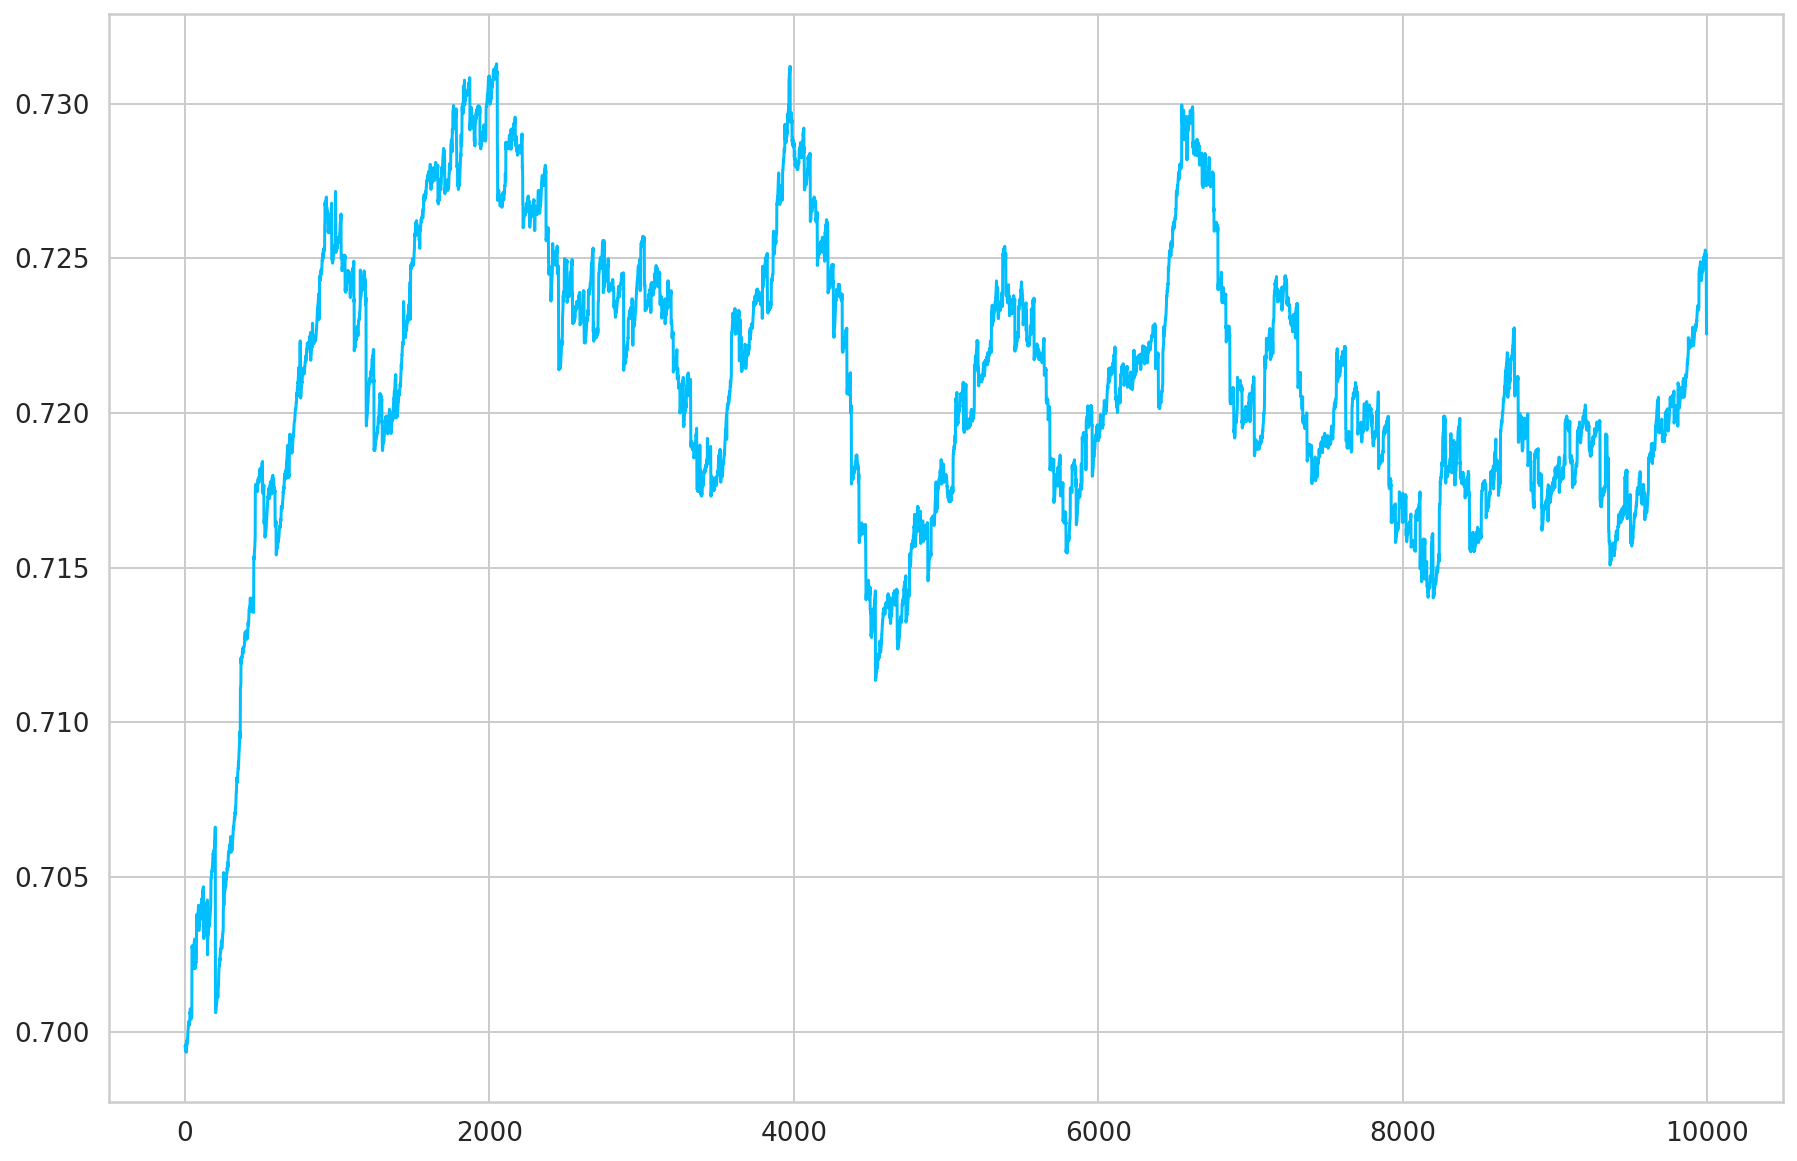

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 15, 10


plt.plot(range(len(efficiency)), efficiency)
#plt.plot(range(model.number_of_iterations-1), losses)
plt.show()

In [ ]:
torch.save(model.state_dict(), 'weights.pt')

In [ ]:
model.load_state_dict(torch.load('weights.pt'))
model.eval()

Reinforce(
  (block): Block(
    (ln1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
    (ln2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
    (attn): CausalSelfAttention(
      (key): Linear(in_features=2, out_features=16, bias=True)
      (query): Linear(in_features=2, out_features=16, bias=True)
      (value): Linear(in_features=2, out_features=16, bias=True)
      (attn_drop): Dropout(p=0.1, inplace=False)
      (resid_drop): Dropout(p=0.1, inplace=False)
      (proj): Linear(in_features=16, out_features=2, bias=True)
    )
    (mlp): Sequential(
      (0): Linear(in_features=2, out_features=8, bias=True)
      (1): GELU()
      (2): Linear(in_features=8, out_features=2, bias=True)
      (3): Dropout(p=0.1, inplace=False)
    )
  )
  (lin1): Linear(in_features=2592, out_features=1296, bias=True)
  (soft): Softmax(dim=1)
)

In [ ]:
efficiency = []

In [ ]:
def test(model):
    game_state = GameState()
    state, state_, hierarchy, level_num, mask = game_state.get_first(5,6)
    if torch.cuda.is_available():
      state = state.cuda()
      state_ = state_.cuda()

    level = 0

    for e in range(100000):
        # get output from the neural network
        output = model(state, mask)[0]

        action = torch.zeros([model.number_of_actions], dtype=torch.float32)
        if torch.cuda.is_available():  # put on GPU if CUDA is available
            action = action.cuda()

        # get action
        action_index = torch.argmax(output)
        if torch.cuda.is_available():  # put on GPU if CUDA is available
            action_index = action_index.cuda()
        action[action_index] = 1

        # get next state
        state_1, state__1, reward, terminal, hierarchy, level_num, mask_1 = game_state.step(action, state_, hierarchy, level_num)


        # set state to be state_1
        state = state_1
        state_ = state__1
        mask = mask_1

In [ ]:
test(model)

+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age
+1 age

In [ ]:
np.mean([float(i) for i in efficiency])*100

In [ ]:
action_index

In [ ]:
class Reinforce(nn.Module):
  def __init__(self):
    super(Reinforce, self).__init__()
    self.number_of_actions = 1296
    self.gamma = .999
    self.final_epsilon = .7
    self.initial_epsilon = .9
    self.number_of_iterations = 5000
    self.replay_memory_size = 10000
    self.minibatch_size = 128

    # input: [1,1296,2]
    
    self.conv1 = nn.Conv2d(2,20, (3,2), 1)
    self.conv2 = nn.Conv2d(20,30, (3,10), 3)
    self.norm1 = nn.BatchNorm2d(20)
    self.norm2 = nn.BatchNorm2d(30)
    self.relu = nn.ReLU()

    self.ln1 = nn.Linear(30*429, 5184)
    self.ln2 = nn.Linear(5184, self.number_of_actions)
    self.drop = nn.Dropout(.35)
    self.soft = nn.Softmax(1)

  def forward(self, x, mask):
    

    x = x.float()

    x = self.norm1(self.relu(self.conv1(x)))
    x = self.norm2(self.relu(self.conv2(x)))
    x = x.view(batch_size, -1)
    x = self.relu(self.ln1(x))
    x = self.ln2(x)
    mask = mask.view(batch_size,1296)
    x = torch.where(mask>0, x, mask)
    x = self.soft(x)

    return x


def init_weights(m):
  if type(m) == nn.Conv2d or type(m) == nn.Linear:
      torch.nn.init.uniform_(m.weight, -0.01, 0.01)
      m.bias.data.fill_(0.01)

In [ ]:
model = Reinforce()
print(model)
if torch.cuda.is_available():
  model = model.cuda()
model.apply(init_weights)
optimizer = torch.optim.RMSprop(model.parameters())
criterion = nn.SmoothL1Loss()
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of parameters: {count_parameters(model)}')
epsilon = model.initial_epsilon
iteration = 1

epsilon_decrements = np.linspace(model.initial_epsilon, model.final_epsilon, model.number_of_iterations)

In [ ]:

game_state = GameState()
state, hierarchy, level_num, mask = game_state.get_first(5,6)
if torch.cuda.is_available():
  state = state.cuda()


print([len(i) for i in hierarchy])


In [ ]:
#cudnn.benchmark = True

In [ ]:
losses = []
rewards = []
while iteration < model.number_of_iterations:
    # get output from the neural network
    
    hierarchy_t = copy.deepcopy(hierarchy)
    
    for i in range(5):
      while len(hierarchy_t[i])!=1296:
        hierarchy_t[i].append([0.,0.])

    hierarchy_t = torch.from_numpy(np.array(hierarchy_t))
    hierarchy_t = hierarchy_t.permute(2,0,1).unsqueeze(0).cuda()
    output = model(hierarchy_t, mask)[0]

    # initialize action
    action = torch.zeros([model.number_of_actions], dtype=torch.float32)
    if torch.cuda.is_available():  # put on GPU if CUDA is available
        action = action.cuda()

    # epsilon greedy exploration
    random_action = random.random() <= epsilon
    #if random_action: print("Performed random action!")
    #else: print("Chose max output!")
    indicies = (output!=0).nonzero()
    action_index = [torch.randint(len(indicies), torch.Size([]), dtype=torch.int)
                    if random_action
                    else torch.argmax(output)][0]

    if torch.cuda.is_available():  # put on GPU if CUDA is available
        action_index = action_index.cuda()

    action[action_index] = 1
      

    # get next state and reward
    state_1, reward, terminal, hierarchy_1, level_num_1, mask_1 = game_state.step(action, state, hierarchy, level_num)
    #print([len(i) for i in hierarchy])
    rewards.append(float(reward))

    
    action = action.unsqueeze(0)
    reward = torch.from_numpy(np.array([reward], dtype=np.float32)).unsqueeze(0)

    hierarchy_1t = copy.deepcopy(hierarchy_1)

    for i in range(5):
      while len(hierarchy_1t[i])!=1296:
        hierarchy_1t[i].append([0.,0.])
    
    hierarchy_1t = torch.from_numpy(np.array(hierarchy_1t))
    hierarchy_1t = hierarchy_1t.permute(2,0,1).unsqueeze(0).cuda()
    # save transition to replay memory
    replay_memory.append((hierarchy_t, mask, action, reward, hierarchy_1t, terminal, mask_1, torch.tensor([level_num])))

    # if replay memory is full, remove the oldest transition
    if len(replay_memory) > model.replay_memory_size:
        replay_memory.pop(0)

    # epsilon annealing
    epsilon = epsilon_decrements[iteration]

    # sample random minibatch
    minibatch = random.sample(replay_memory, min(len(replay_memory), model.minibatch_size))

    # unpack minibatch
    hierarchy_batch = torch.cat(tuple(d[0] for d in minibatch))
    mask_batch = torch.cat(tuple(d[1] for d in minibatch))
    action_batch = torch.cat(tuple(d[2] for d in minibatch))
    reward_batch = torch.cat(tuple(d[3] for d in minibatch))
    hierarchy_1_batch = torch.cat(tuple(d[4] for d in minibatch))
    mask_1_batch = torch.cat(tuple(d[6] for d in minibatch))
    level_num_batch = torch.cat(tuple(d[7] for d in minibatch))
    

    if torch.cuda.is_available():  # put on GPU if CUDA is available
        hierarchy_batch = hierarchy_batch.cuda()
        mask_batch = mask_batch.cuda()
        action_batch = action_batch.cuda()
        reward_batch = reward_batch.cuda()
        hierarchy_1_batch = hierarchy_1_batch.cuda()
        mask_1_batch = mask_batch.cuda()
        level_num_batch = level_num_batch.cuda()
    #print(state_1_batch.size())
    # get output for the next state
    output_1_batch = model(hierarchy_1_batch, mask_1_batch)

    # set y_j to r_j for terminal state, otherwise to r_j + gamma*max(Q)
    y_batch = torch.cat(tuple(reward_batch[i] if minibatch[i][5]
                              else reward_batch[i] + model.gamma * torch.max(output_1_batch[i])
                              for i in range(len(minibatch))))

    # extract Q-value
    q_value = torch.sum(model(hierarchy_batch, mask_batch) * action_batch, dim=1)

    # PyTorch accumulates gradients by default, so they need to be reset in each pass
    optimizer.zero_grad()

    # returns a new Tensor, detached from the current graph, the result will never require gradient
    y_batch = y_batch.detach()

    # calculate loss
    loss = criterion(q_value, y_batch)
    losses.append(loss.item())

    if iteration % 1000 == 0:
      print(f'Epoch: {iteration}/{model.number_of_iterations}')
      print('Av loss: ', np.mean(losses[-1000:]))
      #print(hierarchy)
      print([len(i) for i in hierarchy])
      print('Efficiency: ', np.mean([float(i) for i in efficiency[-1000:]]))
      #competences = [hierarchy_batch[i][list(action_batch[i]).index(1)] for i in range(model.minibatch_size)]
      indicies_ = [list(action_batch[i]).index(1) for i in range(model.minibatch_size)]
      #print('Competences: ', competences)
      print('Indicies: ', indicies_)
      #print(f'Average age: {torch.mean(torch.tensor([i[0] for i in competences]))}, average comp: {torch.mean(torch.tensor([i[1] for i in competences]))}')
      print(f'Level promoted to: {[int(level_num_batch[i])+1 for i in range(model.minibatch_size)]}')
      #print(f'Level promoted from: {[int(level_num_batch[i])+2 for i in range(model.minibatch_size)]}')
      print('Epsilon: ', epsilon)
      print('Rewards: ', np.mean(rewards[-1000:]))
      #print(f'Share of non-zero: {round((len([i for i in competences if list(i)!=[0.,0.]])/len(competences))*100, 2)}%')


    # do backward pass
    loss.backward()
    optimizer.step()

    # set state to be state_1
    state = state_1
    mask = mask_1
    level_num = level_num_1
    hierarchy = hierarchy_1
    iteration += 1

In [ ]:
print(efficiency[-100:])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 15, 10


plt.plot(range(len(efficiency)), efficiency)
#plt.plot(range(model.number_of_iterations-1), losses)
plt.show()

In [ ]:
torch.save(model.state_dict(), 'weights.pt')

In [ ]:
model.load_state_dict(torch.load('weights.pt'))
model.eval()

In [ ]:
efficiency = []

In [ ]:
def test(model):
    game_state = GameState()
    state, hierarchy, level_num, mask = game_state.get_first(5,6)
    if torch.cuda.is_available():
      state = state.cuda()


    level = 0

    for e in range(100000):
        # get output from the neural network
        output = model(state, mask)[0]

        action = torch.zeros([model.number_of_actions], dtype=torch.float32)
        if torch.cuda.is_available():  # put on GPU if CUDA is available
            action = action.cuda()

        # get action
        action_index = torch.argmax(output)
        if torch.cuda.is_available():  # put on GPU if CUDA is available
            action_index = action_index.cuda()
        action[action_index] = 1

        # get next state
        state_1, reward, terminal, hierarchy, level_num, mask_1 = game_state.step(action, state, hierarchy, level_num)


        # set state to be state_1
        state = state_1
        mask = mask_1

In [ ]:
test(model)

In [ ]:
print(np.mean(efficiency)*100)

In [ ]:
print(efficiency[:100])
print(efficiency[-100:])

In [ ]:
import torch
from torch import nn

a = torch.tensor([[0,0],[1,4],[2,6],[0,-1],[6,2]])
mask = torch.ones(a.size()[0])
ind = dict(zip(range(len(a)), [list(i) for i in a]))
          
for i in ind:
  if ind[i] == [0.,0.]:
    mask[i] = 0.


print(mask)
print(mask.size())


In [ ]:


a = torch.tensor([[0,0],[1,4],[2,6],[0,-1],[6,2]])
print(a.size())
a = a.view(1, a.size()[0], a.size()[1])
b = torch.tensor([3,0,4,9,9])

class TestNN(nn.Module):
  def __init__(self):
    super(TestNN, self).__init__()

    self.lin1 = nn.Conv1d(2, 4, 2, 1)
    self.lin2 = nn.Linear(16,5)

  def forward(self, x, mask):
    batch_size = x.size()[0]
    x = x.permute(0,2,1)
    x = self.lin1(x)
    x = x.view(batch_size, -1)
    x = self.lin2(x)
    x = torch.where(mask>0, x, mask)

    return x

model = TestNN()
print(model(a.float(), mask))

  
